In [1]:
import sys
sys.path.insert(0, '../tools')

%load_ext prov_magics
import provn
import mutable_prov

In [2]:
from pprint import pprint
import annotations as prov

In [3]:
from datetime import datetime
def time():
    return datetime.now().strftime("%Y-%m-%dT%H:%M:%S.%f")

3


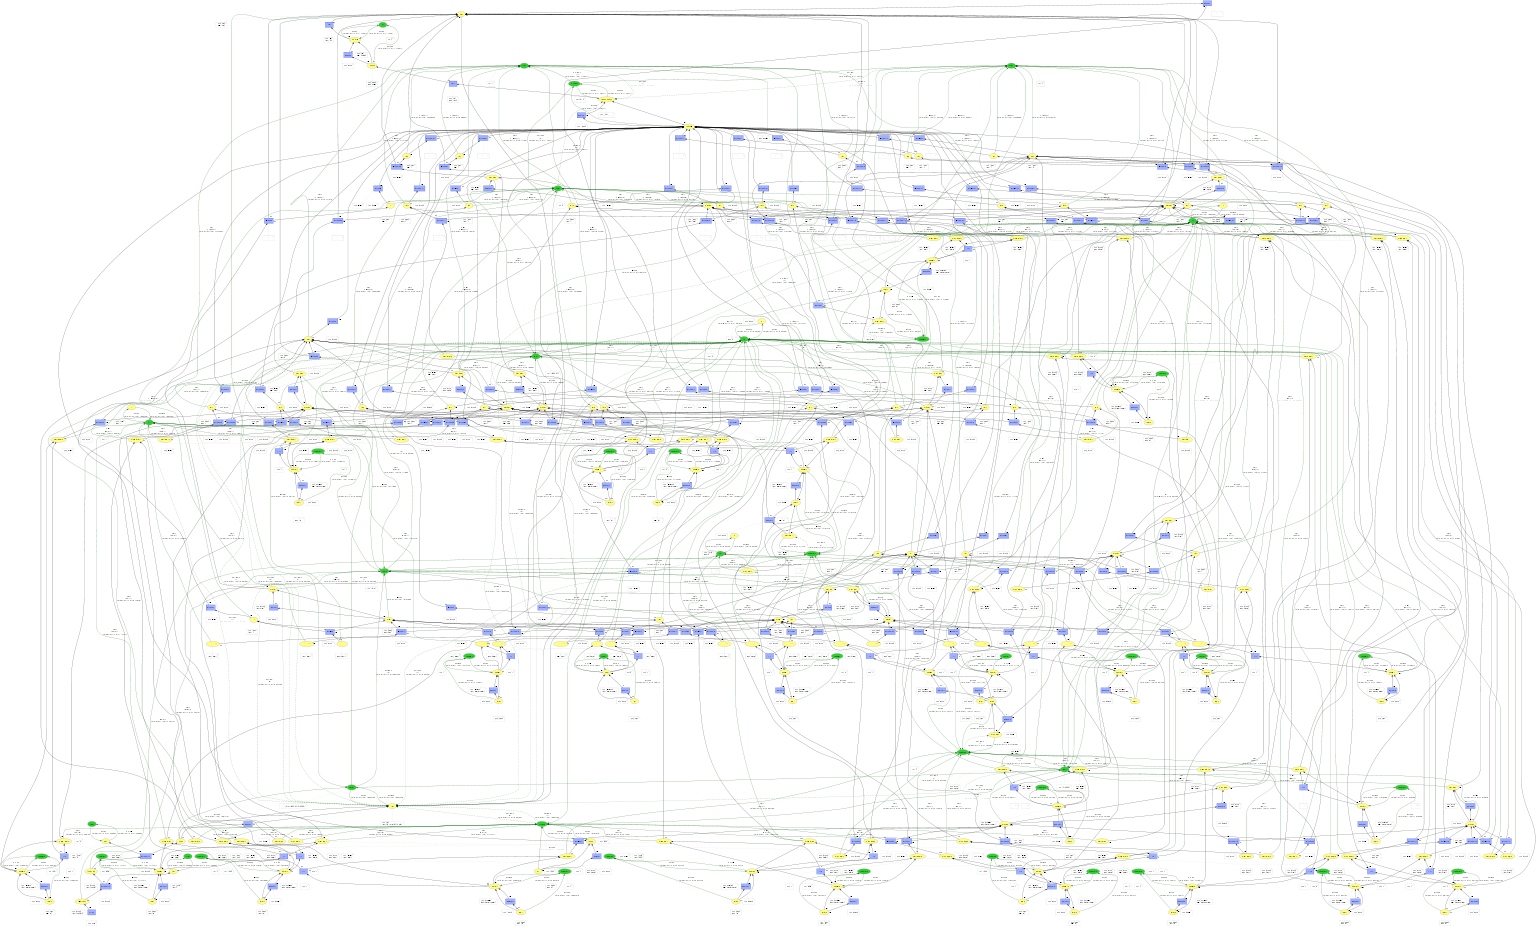

[('used', 336),
 ('entity', 218),
 ('activity', 211),
 ('wasGeneratedBy', 210),
 ('accessedPart', 134),
 ('wasDerivedFrom', 101),
 ('accessed', 47),
 ('value', 43),
 ('defined', 37),
 ('wasDefinedBy', 37),
 ('derivedByInsertion', 8)]


In [4]:
import importlib
import annotations as prov
importlib.reload(prov)
prov.reset_prov("../mutable_prov/temp/")

# Line 1
m = 10000 # max value

with prov.desc("L1 - assign"):
    e_n10000 = prov.entity("10000", None, "literal", "10000")
    v_10000 = prov.value("v10000", "10000")
    prov.defined(e_n10000, v_10000, time())
    
    e_m = prov.entity("m", None, "name", "m")
    prov.activity("assign", [(e_m, e_n10000)])
    prov.accessed(e_m, v_10000, time())

# Line 2
result = dist = [
    [0, 1, 4],
    [m, 0, 2],
    [2, m, 0],
]

with prov.desc("L2 - list definition / assign"):
    
    with prov.desc("L2 - list definition"):
        e_n0 = prov.entity("0", None, "literal", "0")
        v_0 = prov.value("v0", "0")
        prov.defined(e_n0, v_0, time())
        
        e_n1 = prov.entity("1", None, "literal", "1")
        v_1 = prov.value("v1", "1")
        prov.defined(e_n1, v_1, time())
        
        e_n4 = prov.entity("4", None, "literal", "4")
        v_4 = prov.value("v4", "4")
        prov.defined(e_n4, v_4, time())
        
        e_n2 = prov.entity("2", None, "literal", "2")
        v_2 = prov.value("v2", "2")
        prov.defined(e_n2, v_2, time())
        
        
        prov_dist = [
            [e_n0, e_n1, e_n4],
            [e_m, e_n0, e_n2],
            [e_n2, e_m, e_n0],
        ]
        prov_label = [
            ["0", "1", "4"],
            ["m", "0", "2"],
            ["2", "m", "0"]
        ]
        
        e_list = prov.entity("list", None, "list", prov.calc_label(prov_label))
        rows = []
        for i, row in enumerate(prov_dist):
            v_row = prov.value("row{}".format(i), repr(dist[i]))
            prov.derivedByInsertion(
                e_list, v_row,
                [(str(j), prov.VALUES[v]) for j, v in enumerate(row)],
                time()
            )
            rows.append((str(i), v_row))
        ti = time()
        v_list = prov.value("list", repr(dist))
        prov.derivedByInsertion(
            e_list, v_list, rows, ti
        )
        prov.defined(e_list, v_list, ti)
    
        
    with prov.desc("L2 - assign"):
        e_dist = prov.entity("dist", None, "name", "dist")
        prov.accessed(e_dist, v_list, time())

        e_result = prov.entity("result", None, "name", "result")
        prov.accessed(e_result, v_list, time())

        prov.activity("assign", [(e_dist, e_list)])
        prov.activity("assign", [(e_result, e_list)])

# Line 7
nodes = len(dist)

with prov.desc("L7 - func call / assign"):
    e_ret = prov.entity("len_dist", None, "eval", "len(dist)")
    v_3 = prov.value("v3", "3")
    prov.defined(e_ret, v_3, time())
    prov.activity("call", [], [e_dist], [e_ret], label="len")
    
    e_nodes = prov.entity("nodes", None, "name", "nodes")
    prov.accessed(e_nodes, v_3, time())
    prov.activity("assign", [(e_nodes, e_ret)])

# Line 8
indexes = range(nodes)

with prov.desc("L8 - func call / list assign"):
    e_ret = prov.entity("range_nodes", None, "eval", "range(nodes)")
    vs = [(str(i), prov.value("v{}".format(x), repr(x))) for i, x in enumerate(indexes)]
    v_range = prov.value("v_range", repr(list(indexes)))
    ti = time()
    prov.derivedByInsertion(
        e_ret, v_range, vs, ti
    )
    prov.defined(e_ret, v_range, ti)
    prov.activity("call", [], [e_nodes], [e_ret], label="range")
    
    e_indexes = prov.entity("indexes", None, "name", "indexes")
    prov.accessed(e_indexes, v_range, time())
    prov.activity("assign", [(e_indexes, e_ret)])

# Line 9
for k in indexes:
    with prov.desc("L9 - loop access"):
        e_k = prov.entity("k", None, "name", "k")
        v_k = prov.DICTS[v_range][repr(k)]
        prov.accessedPart(e_k, v_range, repr(k), v_k, time())
        
        prov.activity("access", used=[e_indexes], generated=[e_k])
    
    # Line 10
    distk = dist[k]
    
    with prov.desc("L10 - access / assign"):
        e_dist_ak = prov.entity("dist_ak", None, "access", "dist[k]")
        v_dist_ak = prov.DICTS[v_list][repr(k)]
        prov.accessedPart(e_dist_ak, v_list, repr(k), v_dist_ak, time())

        prov.activity("access", used=[e_dist, e_k], generated=[e_dist_ak])

        e_distk = prov.entity("distk", None, "name", "distk")
        prov.accessed(e_distk, v_dist_ak, time())

        prov.activity("assign", [(e_distk, e_dist_ak)])
    
    # Line 11
    for i in indexes:
        with prov.desc("L11 - loop access"):
            e_i = prov.entity("i", None, "name", "i")
            v_i = prov.DICTS[v_range][repr(i)]
            prov.accessedPart(e_i, v_range, repr(i), v_i, time())

            prov.activity("access", used=[e_indexes], generated=[e_i])
        
        # Line 12
        disti = dist[i]
        
        with prov.desc("L12 - access / assign"):
            e_dist_ai = prov.entity("dist_ai", None, "access", "dist[i]")
            v_dist_ai = prov.DICTS[v_list][repr(i)]
            prov.accessedPart(e_dist_ai, v_list, repr(i), v_dist_ai, time())

            prov.activity("access", used=[e_dist, e_i], generated=[e_dist_ai])

            e_disti = prov.entity("disti", None, "name", "disti")
            prov.accessed(e_disti, v_dist_ai, time())

            prov.activity("assign", [(e_disti, e_dist_ai)])
          
        
        # Line 13
        for j in indexes:
            with prov.desc("L13 - loop access"):
                e_j = prov.entity("j", None, "name", "j")
                v_j = prov.DICTS[v_range][repr(j)]
                prov.accessedPart(e_j, v_range, repr(j), v_j, time())

                prov.activity("access", used=[e_indexes], generated=[e_j])
            
            # Line 14
            ikj = disti[k] + distk[j]
            
            with prov.desc("L14 - access / access / operation / assign"):
                e_disti_ak = prov.entity("disti_ak", None, "access", "disti[k]")
                v_disti_ak = prov.DICTS[v_dist_ai][repr(k)]
                prov.accessedPart(e_disti_ak, v_dist_ai, repr(k), v_disti_ak, time())
                
                prov.activity("access", used=[e_disti, e_k], generated=[e_disti_ak])
               
                e_distk_aj = prov.entity("distk_aj", None, "access", "distk[j]")
                v_distk_aj = prov.DICTS[v_dist_ak][repr(j)]
                prov.accessedPart(e_distk_aj, v_dist_ak, repr(j), v_distk_aj, time())
                
                prov.activity("access", used=[e_distk, e_j], generated=[e_distk_aj])
            
                e_sum = prov.entity("sum", None, "operation", "disti[k] + distk[j]")
                vikj = prov.value("vsum", repr(ikj))
                prov.defined(e_sum, vikj, time())
                prov.activity("+", [(e_sum, e_disti_ak, e_distk_aj)])
                
                
                e_ikj = prov.entity("ikj", None, "name", "ikj")
                prov.accessed(e_ikj, vikj, time())
                prov.activity("assign", [(e_ikj, e_sum)])
                
              
            # Line 15
            with prov.desc("L15 - access"):
                e_disti_aj = prov.entity("disti_aj", None, "access", "disti[j]")
                v_disti_aj = prov.DICTS[v_dist_ai][repr(j)]
                prov.accessedPart(e_disti_aj, v_dist_ai, repr(j), v_disti_aj, time())
                prov.activity("access", used=[e_disti, e_j], generated=[e_disti_aj])
            
            if disti[j] > ikj:
                
                # Line 16
                disti[j] = ikj
                  
                with prov.desc("L16 - part assign with propagation"):
                    used = [e_disti_aj] # from if
                    generated = []
                    e_disti_aj = prov.entity("disti_aj", None, "access", "disti[j]")
                    ti = time()
                    prov.derivedByInsertion(
                        e_disti_aj, v_dist_ai,
                        [(str(j), vikj)],
                        ti
                    )
                    prov.accessed(e_disti_aj, vikj, ti)
                    
                    prov.activity("assign", [(e_disti_aj, e_ikj)], used=[e_disti])

                

# Line 17
print(result[0][2])

with prov.desc("L17 - access / access / call"):
    e_n0 = prov.entity("0", None, "literal", "0")
    v_0 = prov.value("v0", "0")
    prov.defined(e_n0, v_0, time())

    e_n2 = prov.entity("2", None, "literal", "2")
    v_2 = prov.value("v2", "2")
    prov.defined(e_n2, v_2, time())
        
    e_result_a0 = prov.entity("result_a0", None, "access", "result[0]")
    v_result_a0 = prov.DICTS[v_list]["0"]
    prov.accessedPart(e_result_a0, v_list, "0", v_result_a0, time())
    prov.activity("access", used=[e_result, e_n0], generated=[e_result_a0])
    
    
    e_result_a02 = prov.entity("result_a02", None, "access", "result[0][2]")
    v_result_a02 = prov.DICTS[v_result_a0]["2"]
    prov.accessedPart(e_result_a02, v_result_a0, "2", v_result_a02, time())
    prov.activity("access", used=[e_result_a0, e_n2], generated=[e_result_a02])

    prov.activity("print", [], [e_result_a02])

pprint(prov.stats("../mutable_prov/floydwarshall", True))
